## 数据读取、填充、标准化

In [56]:
import pandas as pd

dataset = pd.read_excel("银行贷款审批数据.xlsx")

for col in dataset.iloc[:, 0:6]:
    avg = dataset[col].mean()
    dataset[col].fillna(avg, inplace=True)
    
for col in dataset.iloc[:, 6:15]:
    mid = dataset[col].median()
    dataset[col].fillna(mid, inplace=True)
    
for col in dataset.iloc[:, 0:6]:
    std = dataset[col].std()
    avg = dataset[col].mean()
    dataset[col] = dataset[col].apply(lambda raw: (raw - avg) / std)
    
trainingset = dataset.loc[0:599]

checkset = dataset.loc[600:689]

## 训练集、验证集格式化

In [57]:
import numpy as np

trainingFeatures = np.array(trainingset.iloc[:,0:15])

trainingLabels = np.array(trainingset.y)

testFeatures = np.array(checkset.iloc[:,0:15])

testLabels = np.array(checkset.y)

## 支持向量机预测

In [58]:
from sklearn import svm

SVMClf = svm.SVC(kernel = "linear")

SVMClf.fit(trainingFeatures, trainingLabels)

prediction = SVMClf.predict(testFeatures)

SVMTol = 1
for index in range(len(testLabels)):
    if prediction[index] != testLabels[index]:
        SVMTol -= 1 / len(testLabels)

print("SVM: " + str(round(100 * SVMTol, 2)) + "%")

SVM: 84.44%


## 逻辑回归预测

In [59]:
from sklearn import linear_model

LogClf = linear_model.LogisticRegression(C = 1, max_iter = 1000)

LogClf.fit(trainingFeatures, trainingLabels)

prediction = LogClf.predict(testFeatures)

LogTol = 1
for index in range(len(testLabels)):
    if prediction[index] != testLabels[index]:
        LogTol -= 1 / len(testLabels)
        
print("Log: " + str(round(100 * LogTol, 2)) + "%")

Log: 87.78%


## 神经网络预测

In [63]:
from sklearn import neural_network

NNClf = neural_network.MLPClassifier(max_iter = 1000)

NNClf.fit(trainingFeatures, trainingLabels)

prediction = NNClf.predict(testFeatures)

NNTol = 1
for index in range(len(testLabels)):
    if prediction[index] != testLabels[index]:
        NNTol -= 1 / len(testLabels)
        
print("NN: " + str(round(100 * NNTol, 2)) + "%")

NN: 86.67%


## 预测精度图示

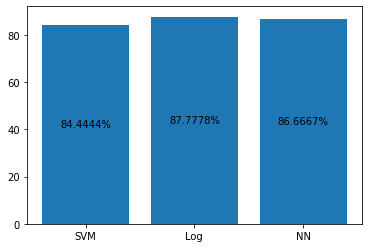

In [64]:
import matplotlib.pyplot as plt

tol = [SVMTol * 100, LogTol * 100, NNTol * 100]

plt.bar_label(plt.bar(range(len(tol)), tol, tick_label = ["SVM", "Log", "NN"]), label_type = "center", fmt = "%g%%")

plt.show()